## Content-based рекомендательнная система

Методы



**Dot Product Similarity**


Вычисляет степень схожести путем умножения соответствующих элементов векторов предпочтений.

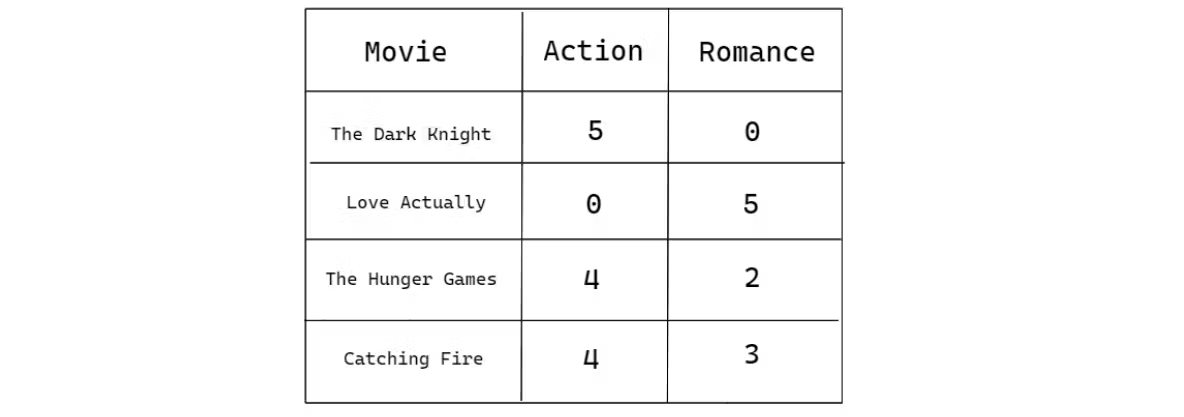

In [ ]:
import numpy as np

# Векторы предпочтений пользователей
film1 = np.array([5, 0])
film2 = np.array([0, 5])
film3 = np.array([4, 2])
film4 = np.array([4, 3])

# Вычисляем сходство через скалярное произведение
similarity1 = np.dot(film1, film2)
similarity2 = np.dot(film3, film4)

print(f"Сходство между фильмами: {similarity1}")
print(f"Сходство между фильмами: {similarity2}")


Чем выше значение скалярного произведения, тем больше схожесть между объектами.

**TF-IDF**

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
movie_matrix= tfidf.fit_transform(movie_summary)

In [ ]:
idx = movie_to_index[movie_title]
movie_test_summary = [movie_summary[idx]]

movie_test_matrix = tfidf.transform(movie_test_summary)
sim_scores = cosine_similarity(movie_test_matrix, movie_matrix).tolist()[0]

In [ ]:
sim_scores = sorted(enumerate(sim_scores), key=lambda i: i[1], reverse=True)
sim_scores = sim_scores[1:11]

movie_indexes = [i[0] for i in sim_scores]
print([movie_title_data[i] for i in movie_indexes])

**Word2Vec**

Позволяет получать векторы слов и находить похожие слова

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Токенизация предложений
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Обучение модели Word2Vec
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Получение вектора слова
vector = model.wv["word"]
print(vector)

# Поиск похожих слов
similar_words = model.wv.most_similar("word")
print(similar_words)

**Bag of Words**

Создает словарь уникальных слов.Формирует матрицу признаков, где строки — это документы, а столбцы — частота слов.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Создание модели BoW
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Вывод матрицы признаков
print("Слова в словаре:", vectorizer.get_feature_names_out())
print("Матрица признаков:\n", X.toarray())


**k-Nearest Neighbors**

Находит топ-k объектов, наиболее похожих на те, что пользователь оценил положительно

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Преобразуем текстовую информацию (жанры) в числовые значения
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(movies_new['overview'])

# Создаем модель KNN
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(X)

# Функция для рекомендации фильмов
def recommend(movie_title):
    movie_idx = movies_new[movies_new['title'] == movie_title].index[0]
    distances, indices = knn.kneighbors(X[movie_idx])

    recommendations = movies_new.iloc[indices[0][1:]]  # Исключаем сам фильм
    return recommendations[['title', 'overview']]

Decision Trees`

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Разделение данных на категории и описания
categories, descriptions = zip(*data)

# Преобразование текстов в числовые векторы (Bag of Words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(descriptions)

# Разделение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, categories, test_size=0.2, random_state=42)

# Создание и обучение модели дерева решений
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Тестирование модели
sample_text = ["descriptions"]
sample_vector = vectorizer.transform(sample_text)
prediction = model.predict(sample_vector)

print("Рекомендованная категория:", prediction[0])
